In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

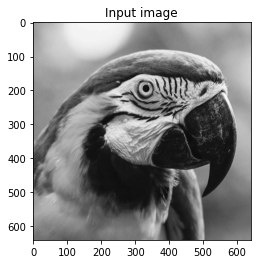

In [2]:
input_image = cv2.imread('arara2.jpg', cv2.IMREAD_GRAYSCALE)

plt.title('Input image')
plt.imshow(input_image,'gray')
plt.show()

## Negativo da imagem

Fórmula para o cálculo do negativo de uma imagem:

$$s = L-1-r$$

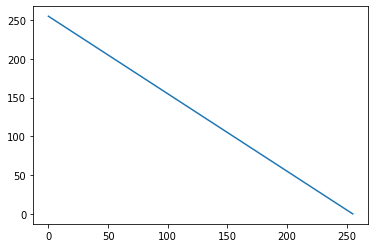

In [3]:
L=256

#Definição do eixo x
x_neg = np.arange(0,L)

#Cálculo da transformação negativa
y_neg = L-1-x_neg

#Plot dos resultados
plt.plot(x_neg, y_neg)
plt.show()

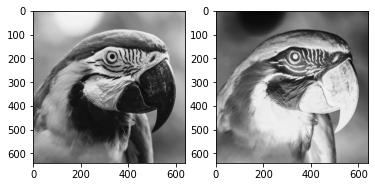

In [4]:
#Quantidade de tons de cinza disponíveis
L = 256

negative_image = input_image.copy()

#Cálculo do negativo da imagem
negative_image = L-1-input_image

#Plot da imagem original ao lado do negativo
fig,ax = plt.subplots(1,2)
plt.subplot(121),plt.imshow(input_image,'gray')
plt.subplot(122),plt.imshow(negative_image, 'gray')
plt.show()

## Transformações logarítmicas

Fórmula para o cálculo do log de uma imagem:

$$s = c\log{(1+r)}$$

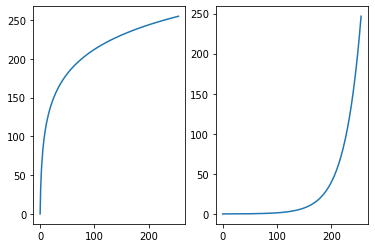

In [5]:
#Definição do eixo x
x_log = np.arange(0,L)

#Cálculo dos fatores de ajuste à faixa de tons de cinza
c_log = (L-1)/np.log(L/1)
c_inv = (L-1)/np.exp(L/30)

#Cálculo da transformação log e log-inversa
y_log = c_log*np.log(1+x_log/1)
y_inv = c_inv*np.exp(x_log/(30))

#Plot dos resultados
fig,ax = plt.subplots(1,2)
plt.subplot(121),plt.plot(x_log, y_log)
plt.subplot(122),plt.plot(x_log, y_inv)
plt.show()

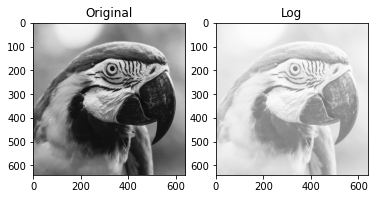

In [6]:
log_image = input_image.copy()

#Fator de conversão para range de valores de cinza
c = (L-1)/np.log(L/1)

#Cálculo do log da imagem de entrada
log_image = np.round(c*np.log(1+input_image/1))

#Adequação do tipo de array para plot
log_image = log_image.astype(int)

#Plot da imagem original ao lado do log
fig,ax = plt.subplots(1,2)
plt.subplot(121),plt.imshow(input_image,'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(log_image, 'gray'),plt.title('Log')
plt.show()

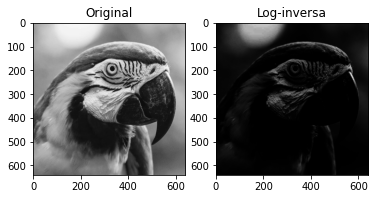

In [7]:
log_inv_image = input_image.copy()

#Fator de conversão para range de valores de cinza
c_log_inv = (L-1)/np.log(L/30)

#Cálculo do log da imagem de entrada
log_inv_image = np.round(c_log_inv*np.exp(input_image/30))

#Adequação do tipo de array para plot
log_inv_image = log_inv_image.astype(int)

#Plot da imagem original ao lado do log-inversa
fig,ax = plt.subplots(1,2)
plt.subplot(121),plt.imshow(input_image,'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(log_inv_image, 'gray'),plt.title('Log-inversa')
plt.show()

A imagem aparenta estar mais clara na transformação log porque os tons escuros foram mapeados para uma faixa mais ampla de valores. Já na imagem com a transformação log-inversa é verificado o exato oposto.

## Transformações Potência de n (Gama)

Fórmula geral para transformações Gama:

$$s = c(r+\epsilon)^{\gamma}$$

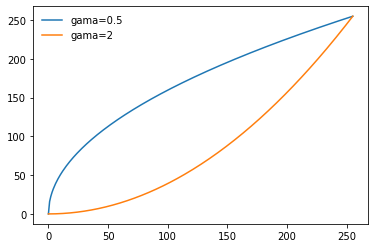

In [8]:
L=256

#Definição do eixo x
x_gama = np.arange(0,L)

#Definição dos parâmetros da transformação gama
gama1 = 0.5
gama2 = 2
eps_gama = 0
c_gama1 = (L-1)**(1-gama1)
c_gama2 = (L-1)**(1-gama2)

#Cálculo da transformação gama
y_gama1 = c_gama1*(x_gama+eps_gama)**gama1
y_gama2 = c_gama2*(x_gama+eps_gama)**gama2

#Plot dos resultados
fig,ax = plt.subplots(1,1)
ax.plot(x_gama, y_gama1, label='gama=0.5')
ax.plot(x_gama, y_gama2, label='gama=2')
ax.legend(loc='best', frameon=False)
plt.show()

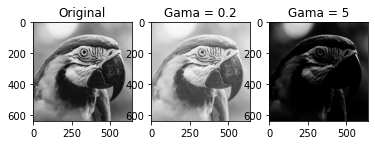

In [9]:
gama_image = input_image.copy()

#Fator de conversão para range de valores de cinza
gama = 0.2
gama2 = 5.
c_gama1 = (L-1)**(1-gama1)
c_gama2 = (L-1)**(1-gama2)
eps_gama = 0

#Cálculo do gama
gama_image1 = np.round(c_gama1*np.power(input_image+eps_gama,gama1))
gama_image2 = np.round(c_gama2*np.power(input_image+eps_gama,gama2))

#Adequação do tipo de array para plot
gama_image1 = gama_image1.astype(int)
gama_image2 = gama_image2.astype(int)

#Plot da imagem original ao lado do log-inversa
fig,ax = plt.subplots(1,3)
plt.subplot(131),plt.imshow(input_image,'gray'),plt.title('Original')
plt.subplot(132),plt.imshow(gama_image1, 'gray'),plt.title('Gama = 0.2')
plt.subplot(133),plt.imshow(gama_image2, 'gray'),plt.title('Gama = 5')
plt.show()